# Intuition of Data Driven Computation and Learning Algorithms


## Learning objectives:

- To experience loading and viewing datasets in python. specifically a dogs-vs-cats example dataset
- To experience building and manipulating a convolutional neural network (CNN) machine learning model
- To explore the impact of increasing the amount of data used to train a model on computation and performance.
- Visualise and relate the concepts of cost function optimisation and gradient descent within a NN.
- Gain an intuition for the concept and use of manifold learning in parameter space.

In [1]:
#!pip install tensorflow
import sys
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)


#------------- Print versions and paths for potential debugging -------------------------

#print('Python version:', python_version()) # print the version of python the script is using
#print('Python path:', sys.executable) # print the path for the python executable the script is using
#print('Working Directory:', os.getcwd()) # print the current working directory 
#print ("TensorFlow version: " + tf.__version__) # print the tensorflow version

## 1. Convolutional neural network for classifying dogs and cats




## 1.1 Viewing and Loading the Cats-vs-Dogs dataset
    
Load the images of cats and dogs, to train & test a CNN model.

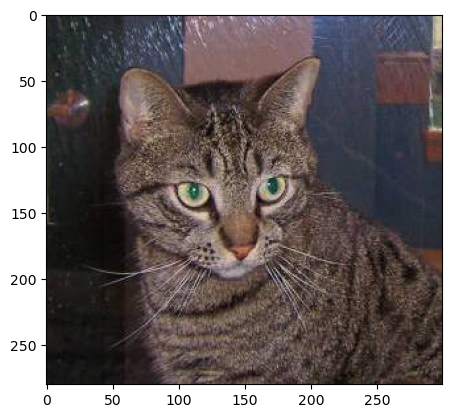

In [2]:
FILE_PATH = "datasets/100-dogs-vs-cats/dogs-vs-cats/dogs-vs-cats/train" #

catImage = FILE_PATH + "/cat.1.jpg" # The file directory for the first image of a cat.

img = mpimg.imread(catImage) # read the image as a matplotlib image

plt.imshow(img) # chart the image


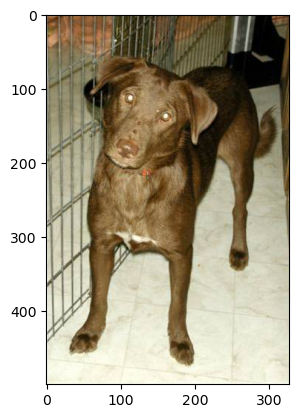

In [3]:
# Display an image of a dog using matplotlib image.

dogImage = FILE_PATH + "/dog.1.jpg"

img = mpimg.imread(dogImage)

plt.imshow(img)

## 1.2 Organising and labelling the images into cats and dogs. 


The code below, will search through the cats-vs-dogs folder, creating an array of categories, to label images for training and testing of CNN. It loads the data, into a Pandas DataFrame named `df`.

Conveniently, the image filenames contain their labels, so processing the images into our programme and sorting them into Cat and Dog images with lables is as simple.

In [4]:
filenames=os.listdir(FILE_PATH)


#Loop through all files, in the filenames list (listdir(FILE_PATH))
categories=[]    

for f_name in filenames:
    
    # The category of an image is the first element in the array of the filename, split by the '.' de-limiter.
    category=f_name.split('.')[0]
    
    
    # Dogs need to be appended to 'categories' with the value (1) while cats need to be appended with the value (0).
    if category == "dog": 
        categories.append(1)
    else:
        categories.append(0)    

df=pd.DataFrame({
    
    'filename':filenames,
    'category':categories
})

print(df)

       filename  category
0     cat.0.jpg         0
1     cat.1.jpg         0
2    cat.10.jpg         0
3    cat.11.jpg         0
4    cat.12.jpg         0
..          ...       ...
195  dog.95.jpg         1
196  dog.96.jpg         1
197  dog.97.jpg         1
198  dog.98.jpg         1
199  dog.99.jpg         1

[200 rows x 2 columns]


In [5]:
# Print the total number of images within the directory
numOfImg = str(len(df))


# Print total number of cats in directory
numOfCats = 0
for x in df["category"]:
    if x == 0:
        numOfCats += 1


# Print total number of dogs in directory
numOfDogs = 0
for x in df["category"]:
    if x == 1:
        numOfDogs += 1


print("Number of Cats ", numOfCats)
print("Number of Dogs ", numOfDogs)
print("Total number of images = ", numOfImg)

Number of Cats  100
Number of Dogs  100
Total number of images =  200


In [6]:
# Define image dimensions for the model
Image_Width=128 # pixel width of image.

Image_Height=128 # pixel height of image.

Image_Size=(Image_Width,Image_Height) # resolution of image.

Image_Channels=3 # number of colour channels in images.

## 1.3 Assembling the CNN


A remnder note on the architecture of CNNs:

- Convolution layers consist of filters that pass over the image data and amplify the most significant features within that image (the values in the filters are learnt).
- Convolutional layers, by virtue of passing filters over data, have the effect of reducing the resolution of the data.
- Max pooling layers have the effect of reducing the dimensionality of image data, whilst retaining the most significant features. Think of this as averagin over the image with the addtion of helping the model learn feature for a range of resolution images.
- Finally the dense (fully connected) layers make the classification decision, these are classic Neural Net layers

Here we define our own model in the code below it is a convoltiouanl nueral Net (CNN) similar to the VGG-16 model, however here for ease of computional (faster) - bulid a slightly smaller model.

In [7]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)      

## 1.4   Preparing the data for use in training the model.


The images of cats and dogs get formatted to the correct shape (128x128x3) and then inputted into CNN model. Once the image has been selected, it must pass through all of the different layers within the underlying neural network, such that the model can learn the correct weights attributed to the image.


After weights have been trained, features within the images activate the same or very similar neural pathways as the ones trained by the training data, such that the model can give the impression of having learnt how to discriminate between classes.



### 1.4.1 Configuring the data for highest accuracy possible

The code below is dedicated to manipulating the image data, such that it can train the CNN to be robust in its classification of cats and dogs. The model will manipulate images, by rotating, zooming, flipping axis and resizing images, so that the model does not get used to classifying only certain perspectives of images of cats and dogs.

In [8]:
from datagen import gen_data
validation_generator, test_generator, train_generator, total_validate, batch_size, total_train, callbacks, learning_rate_reduction, earlystop = gen_data(df, model, FILE_PATH, Image_Size)

Found 160 validated image filenames belonging to 2 classes.
Found 40 validated image filenames belonging to 2 classes.
Found 160 validated image filenames belonging to 2 classes.


## 1.4 Training the model

 The model is being trained on 80% of the dogs-vs-cats dataset and tested on 20%.

In [9]:
# Press to run
epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10


10/10 [==============================] - 11s 920ms/step - loss: 2.0732 - accuracy: 0.5437 - val_loss: 0.7260 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 6s 639ms/step - loss: 1.1871 - accuracy: 0.6062 - val_loss: 1.2082 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 1.2290 - accuracy: 0.5875
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 [==============================] - 7s 651ms/step - loss: 1.2290 - accuracy: 0.5875 - val_loss: 1.9049 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - 6s 578ms/step - loss: 0.7405 - accuracy: 0.6750 - val_loss: 2.7313 - val_accuracy: 0.5000 - lr: 5.0000e-04
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.7301 - accuracy: 0.6750
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
10/10 [==============================] - 7s 

### 1.3 CNN Model analytics

CNN model has been trained, Visualize the process it went through when attempting to learn the essence of dogs and cats, within the pictures.

In [10]:
def plot_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.title('Training accuracy')
    plt.legend()
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.title('Training loss')
    plt.legend()
    plt.show()
    
    plt.plot(epochs, loss, c='b', label='Training Loss')
    plt.plot(epochs, acc, c='r', label='Accuracy')
    plt.title('Accuracy vs Loss')
    plt.legend()
    plt.show


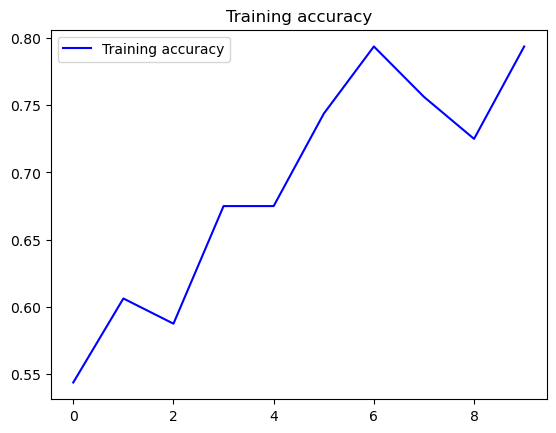

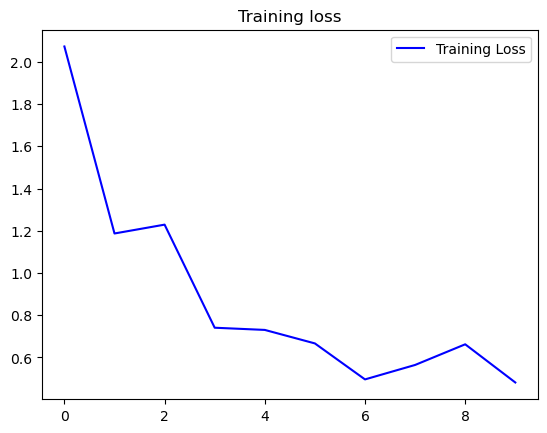

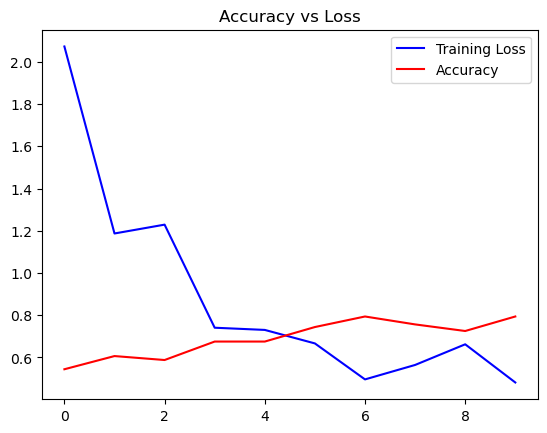

In [11]:
plot_result(history)

### 1.4 Visualisation of CNN features

CNN model is doing to mutating data under the hood to learn:


conv2d 32
32


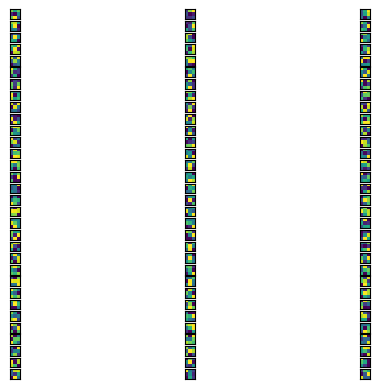

conv2d_1 64
64


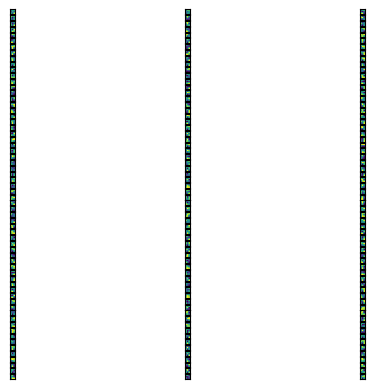

conv2d_2 128
128


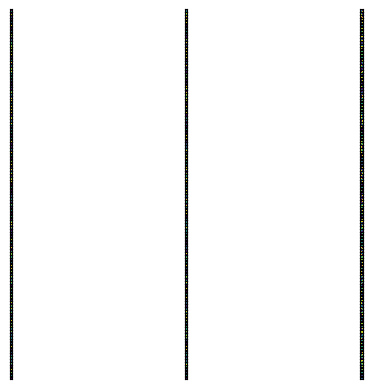

In [12]:
#Iterate through  all the layers of the model
#https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, layer.filters)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

### 1.5 Dogs VS Cats, 300 images:

Increase dataset size to 300 images of cats and dogs, respectively.

#### Load in the dataset - 300 Cats-VS-Dogs

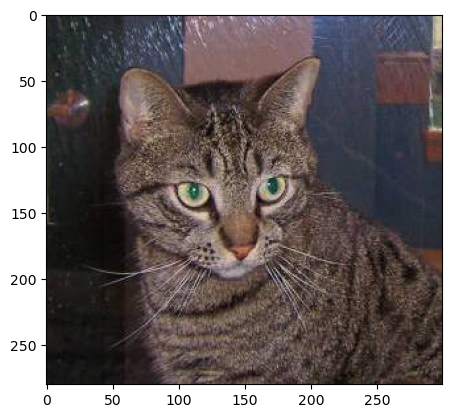

In [13]:
FILE_PATH = "datasets/300-dogs-vs-cats/dogs-vs-cats/dogs-vs-cats/train" #


catImage = FILE_PATH + "/cat.1.jpg" # The file directory for the first image of a cat.

img = mpimg.imread(catImage) # read the image as a matplotlib image

plt.imshow(img) # chart the image

#### Categorise the images in a dataframe

In [14]:
filenames=os.listdir(FILE_PATH)


#Loop through all files, in the filenames list (listdir(FILE_PATH))
categories=[]    

for f_name in filenames:
    
    # The category of an image is the first element in the array of the filename, split by the '.' de-limiter.
    category=f_name.split('.')[0]
    
    # Dogs need to be appended to 'categories' with the value (1) while cats need to be appended with the value (0).
    
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
    
df=pd.DataFrame({
    
    'filename':filenames,
    'category':categories
})

print(df)

        filename  category
0      cat.0.jpg         0
1      cat.1.jpg         0
2     cat.10.jpg         0
3    cat.100.jpg         0
4    cat.101.jpg         0
..           ...       ...
595   dog.95.jpg         1
596   dog.96.jpg         1
597   dog.97.jpg         1
598   dog.98.jpg         1
599   dog.99.jpg         1

[600 rows x 2 columns]


#### Model Architecture

In [15]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 61, 61, 64)       

#### Generate varied representations of images for better generalisation

In [16]:
from datagen import gen_data
validation_generator, test_generator, train_generator, total_validate, batch_size, total_train, callbacks, learning_rate_reduction, earlystop = gen_data(df, model, FILE_PATH, Image_Size)

Found 480 validated image filenames belonging to 2 classes.
Found 120 validated image filenames belonging to 2 classes.
Found 480 validated image filenames belonging to 2 classes.


#### Run the model on 300 images of cats and dogs

In [17]:
epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
30/30 [==============================] - 25s 760ms/step - loss: 1.5936 - accuracy: 0.5500 - val_loss: 1.2656 - val_accuracy: 0.5268 - lr: 0.0010
Epoch 2/10
30/30 [==============================] - 20s 658ms/step - loss: 1.0818 - accuracy: 0.6333 - val_loss: 3.8833 - val_accuracy: 0.5357 - lr: 0.0010
Epoch 3/10
30/30 [==============================] - 20s 653ms/step - loss: 0.9895 - accuracy: 0.6125 - val_loss: 3.5266 - val_accuracy: 0.5089 - lr: 0.0010
Epoch 4/10
30/30 [==============================] - ETA: 0s - loss: 0.9309 - accuracy: 0.6042
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
30/30 [==============================] - 19s 617ms/step - loss: 0.9309 - accuracy: 0.6042 - val_loss: 5.7652 - val_accuracy: 0.5179 - lr: 0.0010
Epoch 5/10
30/30 [==============================] - 20s 650ms/step - loss: 0.7322 - accuracy: 0.6896 - val_loss: 3.1726 - val_accuracy: 0.5000 - lr: 5.0000e-04
Epoch 6/10
30/30 [==============================] - ETA: 

#### Plot accuracy and loss of new model

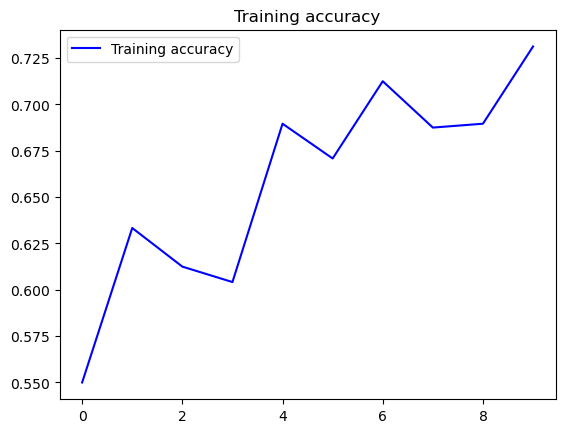

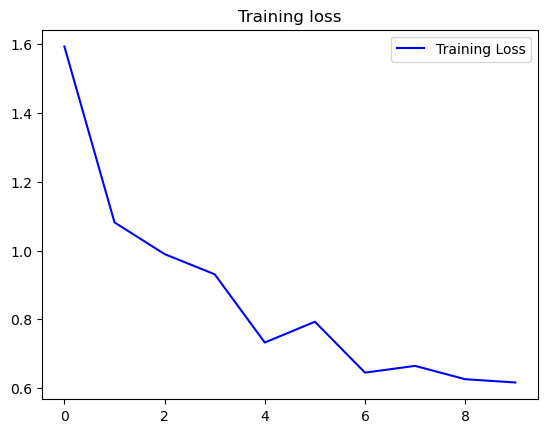

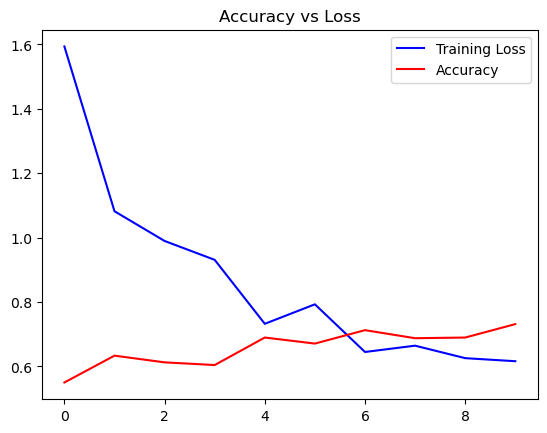

In [18]:
plot_result(history)


### 1.5 Dogs VS Cats, 6000 images:

Increase dataset size to 5000 images of cats and dogs, respectively.



#### Load in the dataset - 6000 Cats-VS-Dogs

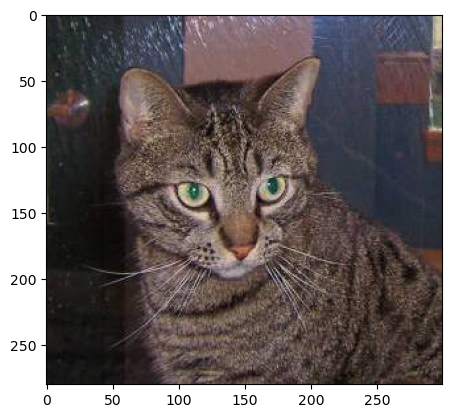

In [19]:
FILE_PATH = "datasets/dogs-vs-cats/dogs-vs-cats/train" #

catImage = FILE_PATH + "/cat.1.jpg" # The file directory for the first image of a cat.

img = mpimg.imread(catImage) # read the image as a matplotlib image

plt.imshow(img) # chart the image

#### Categorise the images in a dataframe

In [20]:
filenames=os.listdir(FILE_PATH)


#Loop through all files, in the filenames list (listdir(FILE_PATH))
categories=[]    

for f_name in filenames:
    
    # The category of an image is the first element in the array of the filename, split by the '.' de-limiter.
    category=f_name.split('.')[0]
    
    # Dogs need to be appended to 'categories' with the value (1) while cats need to be appended with the value (0).
    if category == 'dog': 
        categories.append(1)
    else:
        categories.append(0)    

df=pd.DataFrame({
    
    'filename':filenames,
    'category':categories
})

print(df)

           filename  category
0         cat.0.jpg         0
1         cat.1.jpg         0
2        cat.10.jpg         0
3       cat.100.jpg         0
4      cat.1000.jpg         0
...             ...       ...
11995   dog.995.jpg         1
11996   dog.996.jpg         1
11997   dog.997.jpg         1
11998   dog.998.jpg         1
11999   dog.999.jpg         1

[12000 rows x 2 columns]


#### Model Architecture

In [21]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_8 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 61, 61, 64)       

#### Generate varied representations of images for better generalisation

In [22]:
from datagen import gen_data
validation_generator, test_generator, train_generator, total_validate, batch_size, total_train, callbacks, learning_rate_reduction, earlystop = gen_data(df, model, FILE_PATH, Image_Size)

Found 9600 validated image filenames belonging to 2 classes.
Found 2400 validated image filenames belonging to 2 classes.
Found 9600 validated image filenames belonging to 2 classes.


#### Run the model on 6000 images of cats and dogs

In [23]:
epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
600/600 [==============================] - 376s 623ms/step - loss: 0.8981 - accuracy: 0.5833 - val_loss: 0.6447 - val_accuracy: 0.6383 - lr: 0.0010
Epoch 2/10
600/600 [==============================] - 376s 627ms/step - loss: 0.6207 - accuracy: 0.6702 - val_loss: 0.5692 - val_accuracy: 0.7129 - lr: 0.0010
Epoch 3/10
600/600 [==============================] - 379s 632ms/step - loss: 0.5711 - accuracy: 0.7122 - val_loss: 0.5488 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 4/10
600/600 [==============================] - 372s 619ms/step - loss: 0.5293 - accuracy: 0.7406 - val_loss: 0.4838 - val_accuracy: 0.7679 - lr: 0.0010
Epoch 5/10
600/600 [==============================] - 534s 890ms/step - loss: 0.5058 - accuracy: 0.7608 - val_loss: 0.4639 - val_accuracy: 0.7754 - lr: 0.0010
Epoch 6/10
600/600 [==============================] - 598s 998ms/step - loss: 0.4884 - accuracy: 0.7740 - val_loss: 0.5044 - val_accuracy: 0.7433 - lr: 0.0010
Epoch 7/10
600/600 [==========================

#### Plot accuracy and loss of new model

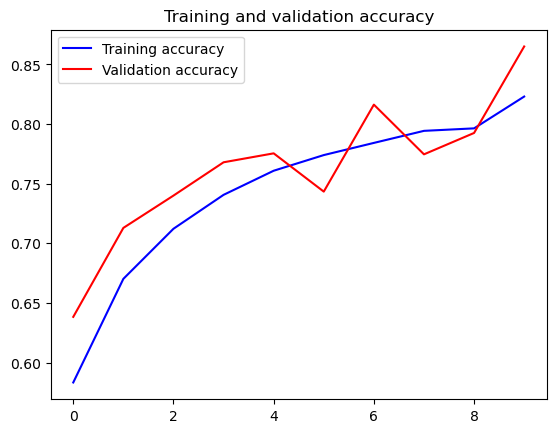

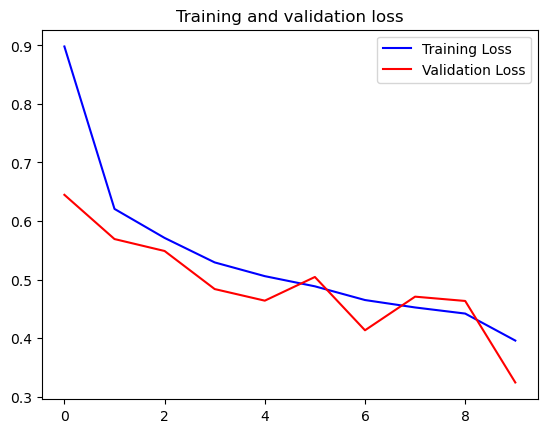

INFO:tensorflow:Assets written to: ./6000-model\assets


INFO:tensorflow:Assets written to: ./6000-model\assets


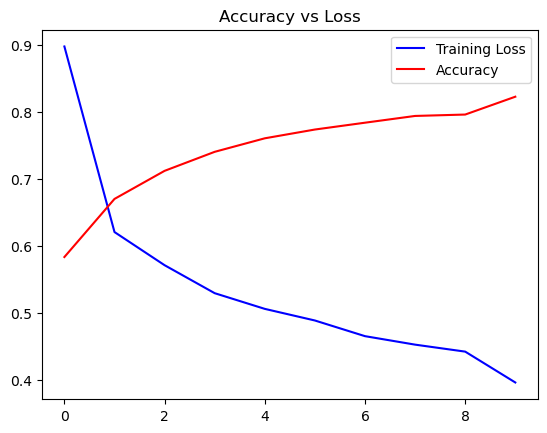

In [24]:
def plot_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, acc, 'r', label = 'Accuracy')
    plt.title('Accuracy vs Loss')
    plt.legend()
    plt.show
    
plot_result(history)

model.save('./6000-model')

# 2. An Introduction to Manifold Learning through t-SNE:


Manifold learning is a concept that decribes the actions of non-linear machine-learning technique shaping and worping a feature space to that it maximiase the chances of discrimantion between classes. Here we will use a technique call dimention reduction so that we can visulise (in low dimentions, two) a process of manifold leanring.

High-dimensional data can often be difficult to separate in a linear fashion. Such data is often described as non-linearly separable, suggesting that the data are too closely intertwined with one another that it would be impossible to draw a straight line of separation between classes.

Typically, data used for machine learning are of a particularly high dimensionality and not commonly linearly separable. The dimension space for deep-learning problems can run from 2-dimensions (2D) through to hundreds, thousands or milions of dimensions.

High-dimensional data can be tricky to work with (how does one visulize a 32-dimensional feature space?). As such, technqiues have been developed to attempt to reduce the dimemensionality of a dataset, whilst retaining within-class relationships and emphasising between-class separability.

One such method of conducting this, is through the use of t-SNE (or t-distributed stochastic neighbour embedding), which can transform high-dimensional, non-linearly separable datasets into linearly separable datasets, by calculating similarities in the data and projecting it onto a lower-dimensional subspace, for linear separation.

Notes on T-SNE:
https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a [7].


### T-SNE at work on a 3D 'S-Curve' dataset.

t-SNE can be used to transform this 3-dimensional dataset into a linearly separable 2-dimensional dataset.


#### Have a go at visulising the dimensionality reduction of a non-linearly separable data through t-SNEs

Follow this link for an interactive web-demo of t-SNE at work on some non-linearly separable problems and have a read of the description of t-SNEs therein to gain an intuition of what's going on under the hood:

https://distill.pub/2016/misread-tsne/ [4] 

### 2.1 Visulise the Digits dataset, using a t-SNE learnt representation

Visulise our the dataset (the sk-learn 'digits' dataset) to see how t-SNE manages to separate data into linearly separable subspaces.

In [25]:
#https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/ [6]

from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
    
def run_tsne(l_r):
    n_components = 2
    # learning_rate = (l_r)
    tsne = TSNE(n_components, learning_rate=l_r)
    tsne_result = tsne.fit_transform(X)
    tsne_result.shape
    tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
    fig, ax = plt.subplots(1)
    sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120).set(title=('Learning rate at: ' + str(l_r)))
    lim = (tsne_result.min()-5, tsne_result.max()+5)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [26]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


digits = load_digits(n_class=10)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30


## Reference link https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
## and plot show what the images within the digits dataset look like.

print(X.shape)
plt.gray()
plt.show()

(1797, 64)


<Figure size 640x480 with 0 Axes>

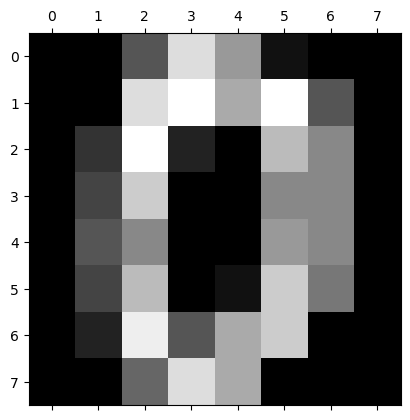

In [27]:
plt.matshow(digits.images[0])
plt.show()

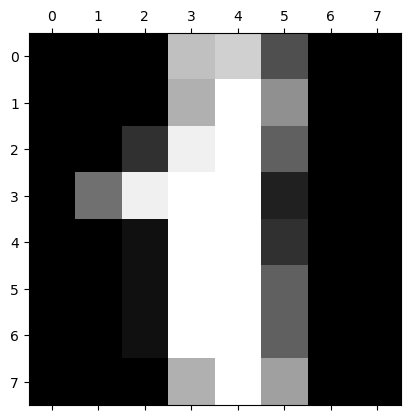

In [28]:
plt.matshow(digits.images[1])
plt.show()

Visulised of data is done, check how all the data is projected onto a 2D space through a t-SNE.

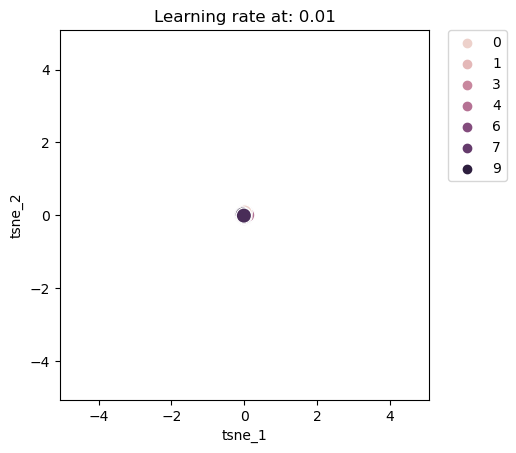

In [29]:

learning_rate = 0.01 

run_tsne(learning_rate)

t-SNE at various learning rates:

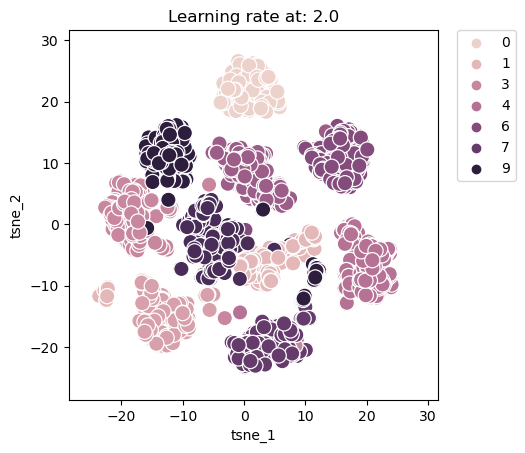

In [30]:
### Start Task ###
lr = 2.0
run_tsne(lr)
### End Task ###

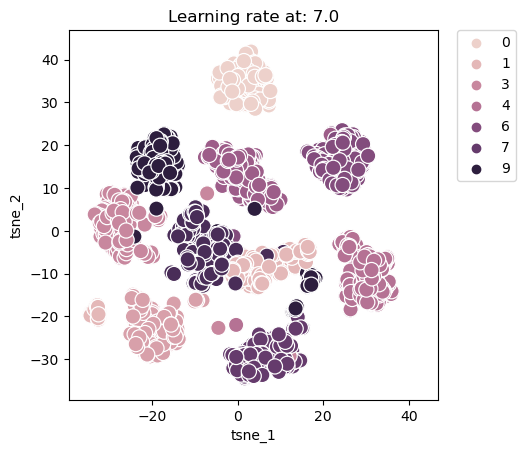

In [31]:
### Start Task ###
lr = 7.0
run_tsne(lr)
### End Task ###

Next, set the learning rates to different levels and see how the t-SNE algorithm performs in separating this previously non-linearly separable data.

# 3. Reflections
In this section you will refelct on the tasks in the workbook and provide answers below.

- How many samples were used in training and testing this CNN?
> Three CNN models were trained with 200, 600 and 12000 images of cats and dogs. With 80% of samples used in training set and 20% used in validation set each time.
- What can you infer from the plot showing training accuracy and how can you relate this to training loss?
> The models became more accurate in terms of correctly classifying training set images as 'cat' or 'dog'. As training accuracy increased, training loss decreased meaning with more training, model is fitting the data well.
- What can you infer from the plot showing accuracy vs loss and how can you relate this to the optimisation algorithm, stochastic gradient descent?
> With more samples, model fitted the data well and gradually classification accuracy increased. In terms of optimization algorithm - SGD, model is moving towards finding a good minima of the cross-entropy loss function, thus with every iteration, model takes a little step towards the minima implying gap between correct label and predicted label is closing in.
- Describe how visualising the learning rates on t-SNE relate to the manipulation of parameter space in CNN learning.
> Visualizing learning rates of t-SNE can help understand how parameter space in CNN learning is being manipulted during training, in other words, how the learning rate is influcing convergence and geeralization of CNN model. A high lr may cause parameter vectors to jump around the parameter space, while a low lr may cause them to settle in a local minima.
- Describe how increased data impacts model performance.
> Using more data to train the model improves its accuracy and generalization ability as it can learn more features and patterns. However, more data also increases computation time and complexity. This is evident from the loss vs accuracy graph and time taken by the three models to trains.


## References:

[1] SciKit-Learn Manifold Learning explanation: https://scikit-learn.org/stable/modules/manifold.html

[2] SciKit-Learn Manifold learning on handwritten digits example: https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

[3] Recognizing cats and dogs with tensorflow: https://towardsdatascience.com/recognizing-cats-and-dogs-with-tensorflow-105eb56da35f

[4] Graphical demonstration of t-SNE:  https://distill.pub/2016/misread-tsne/

[5] Visuliasation of Convolutional feature map and filter visualisation: https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c

[6] Introduction to t-sne with scikit-learn: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/

[7] t-SNE clearly explained: https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a